In [1]:
from quantum_dataset import QM7, QM7b, QM9, Champs, SuperSet
from quantum_learning import Learn, Selector
from quantum_model import FFNet
from torch.optim import Adam
from torch.nn import MSELoss

RDKit WARNING: [11:40:08] Enabling RDKit 2019.09.3 jupyter extensions


<class 'quantum_dataset.QM7'> dataset created...
epoch: 0 of 10, train loss: 789039.1399266759, val loss: 315636.31376121077
epoch: 1 of 10, train loss: 117127.37314507681, val loss: 170931.70612913396
epoch: 2 of 10, train loss: 63739.53294670915, val loss: 122781.80157826513
epoch: 3 of 10, train loss: 44957.6171875, val loss: 82597.69793126402
epoch: 4 of 10, train loss: 42160.10057502619, val loss: 71040.88106957679
epoch: 5 of 10, train loss: 29552.47451662884, val loss: 56709.0719415639
epoch: 6 of 10, train loss: 20657.377310470496, val loss: 43173.96015362248
epoch: 7 of 10, train loss: 15556.184150226954, val loss: 40713.65424870376
epoch: 8 of 10, train loss: 13206.273748472417, val loss: 36336.980181912135
epoch: 9 of 10, train loss: 11827.378390690468, val loss: 37400.03453878223
test loss: 11942.922718394886


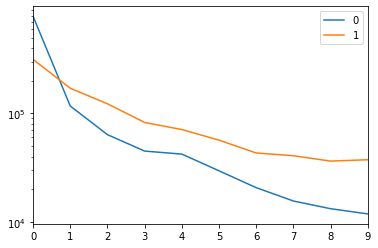

learning time: 0:00:23.571367


In [2]:
opt_params = {'lr': 0.001}
model_params = {'D_in': 23*23, 
                'H': 4096, 
                'D_out': 1, 
                'model_name': 'funnel'}
ds_params = {}
crit_params = {'reduction': 'sum'}

Learn(Dataset=QM7, Model=FFNet, Sampler=Selector, Optimizer=Adam, Criterion=MSELoss, 
      batch_size=32, epochs=10, opt_params=opt_params, model_params=model_params, 
      ds_params=ds_params, crit_params=crit_params, save_model=True, load_model=False)

In [ ]:
opt_params = {'lr': 0.001}
model_params = {'D_in': 23*23+13, 'H': 4096, 'D_out': 1, 'model_name': 'funnel'}
ds_params = {'target': 'E', 
             'features': ['alpha_p','alpha_s','HOMO_g','HOMO_p','HOMO_z','LUMO_g',
                          'LUMO_p','LUMO_z','IP','EA','E1','Emax','Imax']}
crit_params = {'reduction': 'sum'}

Learn(Dataset=QM7b, Model=FFNet, Sampler=Selector, 
      Optimizer=Adam, Criterion=MSELoss, batch_size=32, epochs=10, 
      opt_params=opt_params, model_params=model_params, ds_params=ds_params, 
      crit_params=crit_params, save_model=True, load_model=False)

In [ ]:
opt_params = {'lr': 0.001}
model_params = {'D_in': 29*29+14, 'H': 2048, 'D_out': 1, 'model_name': 'funnel'}
ds_params = {'n': 133885, 
             'features': ['coulomb','A','B','C','alpha','homo','lumo',
                          'gap','r2','zpve','U0','U','H','G','Cv'], 
             'target': 'mu',
             'dim': 29*29,
             'use_pickle': True}
crit_params = {'reduction': 'sum'}

Learn(Dataset=QM9, Model=FFNet, Sampler=Selector, Optimizer=Adam, Criterion=MSELoss,
      batch_size=32, epochs=2, model_params=model_params, ds_params=ds_params, 
      opt_params=opt_params, crit_params=crit_params, save_model=True, load_model=False)

In [ ]:
opt_params = {'lr': 0.001}
model_params = {'D_in': 198+3, 'H': 512, 'D_out': 1, 'model_name': 'funnel'}
ds_params = {'n': 4658146, 
             'features': ['mulliken_charge_x','mulliken_charge_y','potential_energy'],
             'use_h5': True,  
             'infer': False}
crit_params = {'reduction': 'sum'}

Learn(Dataset=Champs, Model=FFNet, Sampler=Selector, Optimizer=Adam, Criterion=MSELoss,
      batch_size=1024, epochs=10, model_params=model_params, ds_params=ds_params, 
      opt_params=opt_params, crit_params=crit_params, save_model=True, load_model=False)

In [ ]:
# A DEMONSTRATION OF TRANSFER LEARNING

# train a model and save it
opt_params = {'lr': 0.001}
model_params = {'D_in': 29*29+15+198+3, 'H': 2048, 'D_out': 1, 'model_name': 'deep'}
qm9_params = {'n': 133885, 
              'features': ['coulomb','A','B','C','mu','alpha','homo','lumo', 
                           'gap','r2','zpve','U0','U','H','G','Cv'],  
              'dim': 29*29, 
              'use_pickle': True}
champs_params = {'n': 4658146, 
                 'features': ['mulliken_charge_x','mulliken_charge_y','potential_energy'],
                 'use_h5': True,  
                 'infer': False}
crit_params = {'reduction': 'sum'}

ds_params = {'PrimaryDS': Champs, 'SecondaryDS': QM9, 'p_params': champs_params, 's_params': qm9_params}

Learn(Dataset=SuperSet, Model=FFNet, Sampler=Selector, Optimizer=Adam, Criterion=MSELoss,
      batch_size=32, epochs=10, model_params=model_params, ds_params=ds_params,
      opt_params=opt_params, crit_params=crit_params, save_model=True, load_model=False)

In [ ]:
# load the model and train it some more and save it
opt_params = {'lr': 0.001}
model_params = {'D_in': 29*29+15+198+3, 'H': 2048, 'D_out': 1, 'model_name': 'deep'}
qm9_params = {'n': 133885, 
              'features': ['coulomb','A','B','C','mu','alpha','homo','lumo', 
                           'gap','r2','zpve','U0','U','H','G','Cv'],  
              'dim': 29*29, 
              'use_pickle': True}
champs_params = {'n': 4658146, 
                 'features': ['mulliken_charge_x','mulliken_charge_y','potential_energy'],
                 'use_h5': True,  
                 'infer': False}
crit_params = {'reduction': 'sum'}

ds_params = {'PrimaryDS': Champs, 'SecondaryDS': QM9, 'p_params': champs_params, 's_params': qm9_params}

Learn(Dataset=SuperSet, Model=FFNet, Sampler=Selector, Optimizer=Adam, Criterion=MSELoss,
      batch_size=32, epochs=2, model_params=model_params, ds_params=ds_params,
      opt_params=opt_params, crit_params=crit_params, save_model=True, load_model='./models/20200524_1259.pth')

In [ ]:
# load a model that was trained on a different sized 
# dataset and adapt it to the new dataset, train only the top
# layer and save it
opt_params = {'lr': 0.001}
model_params = {'D_in': 29*29+15+198+3, 'H': 2048, 'D_out': 1, 'model_name': 'deep'}
qm9_params = {'n': 133885, 
              'features': ['coulomb','A','B','C','mu','alpha','homo','lumo', 
                           'gap','r2','zpve','U0','U','H','G','Cv'],  
              'dim': 29*29, 
              'use_pickle': True}
champs_params = {'n': 4658146, 
                 'features': [],
                 'use_h5': True,  
                 'infer': False}
crit_params = {'reduction': 'sum'}

ds_params = {'PrimaryDS': Champs, 'SecondaryDS': QM9, 'p_params': champs_params, 's_params': qm9_params}

Learn(Dataset=SuperSet, Model=FFNet, Sampler=Selector, Optimizer=Adam, Criterion=MSELoss,
      batch_size=32, epochs=3, model_params=model_params, ds_params=ds_params,
      opt_params=opt_params, crit_params=crit_params, save_model=True, 
      load_model='./models/20200524_1259.pth', adapt=(29*29+15+198,29*29+15+198+3))

In [ ]:
# load the model and train all the layers and save it
opt_params = {'lr': 0.001}
model_params = {'D_in': 29*29+15+198, 'H': 2048, 'D_out': 1, 'model_name': 'deep'}
qm9_params = {'n': 133885, 
              'features': ['coulomb','A','B','C','mu','alpha','homo','lumo', 
                           'gap','r2','zpve','U0','U','H','G','Cv'],  
              'dim': 29*29, 
              'use_pickle': True}
champs_params = {'n': 4658146, 
                 'features': ['mulliken_charge_x','mulliken_charge_y','potential_energy'],
                 'use_h5': True,  
                 'infer': False}
crit_params = {'reduction': 'sum'}

ds_params = {'PrimaryDS': Champs, 'SecondaryDS': QM9, 'p_params': champs_params, 's_params': qm9_params}

Learn(Dataset=SuperSet, Model=FFNet, Sampler=Selector, Optimizer=Adam, Criterion=MSELoss,
      batch_size=32, epochs=2, model_params=model_params, ds_params=ds_params,
      opt_params=opt_params, crit_params=crit_params, save_model=True, load_model='./models/20200524_1259.pth')

In [ ]:
# load the model and perform inference on a test set and save the results
opt_params = {'lr': 0.001}
model_params = {'D_in': 29*29+15+198, 'H': 2048, 'D_out': 1, 'model_name': 'deep', 'adapt': False}
qm9_params = {'n': 133885, 
              'features': ['coulomb','A','B','C','mu','alpha','homo','lumo', 
                           'gap','r2','zpve','U0','U','H','G','Cv'],  
              'dim': 29*29, 
              'use_pickle': True}
champs_params = {'n': 4658146,
                 'use_h5': True,  
                 'infer': True}
crit_params = {'reduction': 'sum'}

ds_params = {'PrimaryDS': Champs, 'SecondaryDS': QM9, 'p_params': champs_params, 's_params': qm9_params}

Learn(Dataset=SuperSet, Model=FFNet, Sampler=Selector, batch_size=32, model_params=model_params, 
      ds_params=ds_params, load_model='./models/20200524_1259.pth')